# **Trabalho desenvolvido por**:   *Grupo Mecdata*


Paulo Yoshio Kuga

Antony Pavarin

Johannes Sesselmann

---


*Unicamp 11/12/2021*

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*O Treino tem as opções se sobreviveu ou não, vamos usar ele para alimentar nosso modelo:*

In [ ]:
Treino = pd.read_csv("/content/drive/Shareddrives/Mecdata/Titanic/train.csv")
Treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*O teste vamos averiguar se o modelo tá certo:*

In [ ]:
Teste = pd.read_csv("/content/drive/Shareddrives/Mecdata/Titanic/test.csv")
Teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


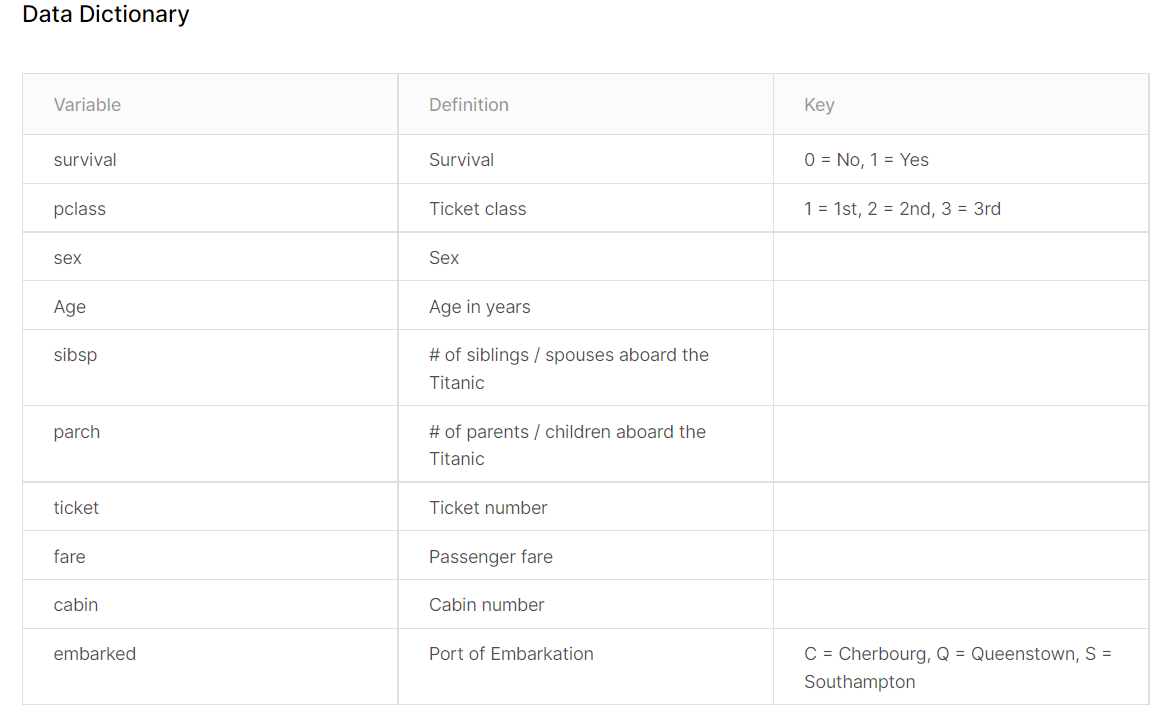

**Variable Notes**


---

**Pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**Age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


---


**SibSp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)


---


**Parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

*Criamos* o **Df_BDP** (Boi De Piranha) para realizar os testes iniciais na no nosso dataset.

*Obs: o boi de piranha é aquele que se submete ou é submetido a um sacrifício para livrar outra pessoa de uma dificuldade ou da culpa. No Mato Grosso, quando os boiadeiros passam por um rio perigoso, eles escolhem um boi mais doente para entrar no rio primeiro e ser comido pelas piranhas, para assim outros bois conseguirem passar com segurança.*

In [ ]:
#Refatoração: renomenclatura de variável -> Df_BDP e remoção de Warning usando .copy() <- Kuga

Nomes = ["Survived", "Pclass", "Age", "Parch", "Sex"]
Nomes2 = ["Pclass", "Age", "Parch", "Sex"]
Df_BDP = Treino[Nomes].copy()
Df_BDP['Sex'] = Treino['Sex'].map({'male': 0,'female': 1})

Teste_tAPP = Teste[Nomes2].copy() #Teste para aplicação
Teste_tAPP['Sex'] = Teste_tAPP['Sex'].map({'male': 0,'female': 1})


In [ ]:
Df_BDP['Age'].fillna(Df_BDP['Age'].mean(), inplace = True)
Teste_tAPP['Age'].fillna(Teste_tAPP['Age'].mean(), inplace = True)

**`Linear Regression with Scikit-Learn`**



In [ ]:
#Teste_tAPP.isnull().sum()

In [ ]:
X = Df_BDP['Age'].values.reshape(-1,1)
y = Df_BDP['Survived'].values

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


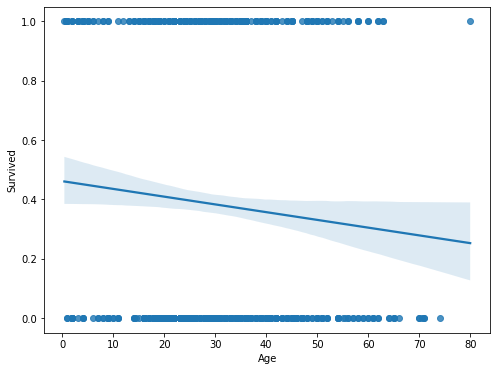

In [ ]:
plt.figure(figsize=(8,6));
sns.regplot(X, y);
plt.xlabel('Age')
plt.ylabel("Survived")
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


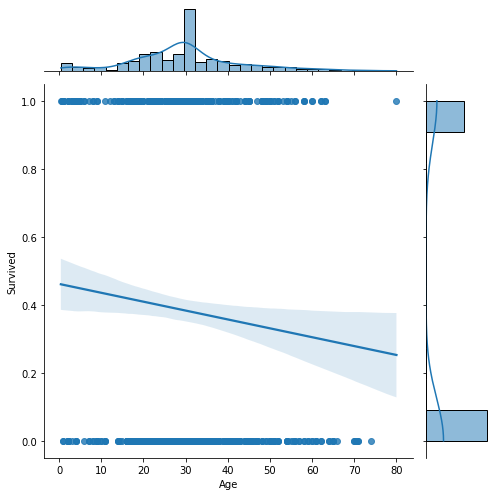

In [ ]:
sns.jointplot(x='Age', y='Survived', data=Df_BDP, kind='reg', size=7);
plt.show();

In [ ]:
X1 = Df_BDP['Pclass'].values.reshape(-1,1)
y1 = Df_BDP['Survived'].values

model1 = LinearRegression()
model1.fit(X1, y1)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


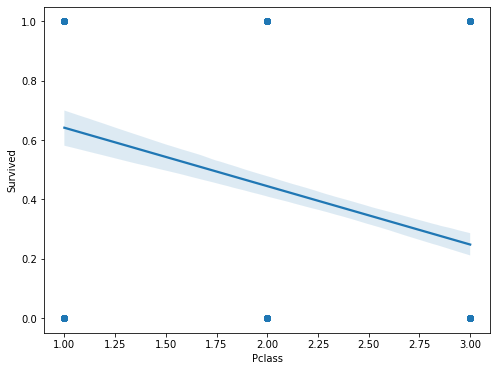

In [ ]:
plt.figure(figsize=(8,6));
sns.regplot(X1, y1);
plt.xlabel('Pclass')
plt.ylabel("Survived")
plt.show();

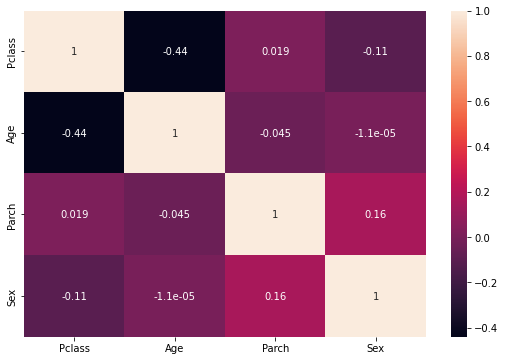

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(Teste_tAPP.corr(), annot=True)
plt.show()

In [ ]:
NomesX = ["Pclass", "Age", "Parch", "Sex"]
NomeY = "Survived"

Treino_80 = Df_BDP.sample(frac=0.8, random_state=0) # 80% dos dados do boi_de_piranha

Validacao = Df_BDP.drop(Treino_80.index) # 20% dos dados do boi_de_piranha

X = Treino_80[NomesX]
y = Treino_80[NomeY]

X_teste = Validacao[NomesX]
y_teste = Validacao[NomeY]

ModeloFloresta = RandomForestClassifier(random_state=1)
ModeloFloresta.fit(X, y)

Predicao = ModeloFloresta.predict(X_teste)
print(accuracy_score(y_teste, Predicao))

0.8258426966292135


Agora que nós testamos com 80% dos dados, vamos usar 100% para aumentar a precisão e finalizar a competição do Kaggle ✌

In [ ]:
X1 = Df_BDP[NomesX]
y1 = Df_BDP[NomeY]

ModeloFloresta = RandomForestClassifier(random_state=1)
ModeloFloresta.fit(X1, y1)

RandomForestClassifier(random_state=1)

In [134]:
Predicao1 = ModeloFloresta.predict(Teste_tAPP)

Resultado = pd.DataFrame(Predicao1,columns=["Survived"])
Resultado.head()



Resultado.reset_index(inplace=True)
Resultado = Resultado.rename(columns = {'index':'PassengerId'})
Resultado["PassengerId"] =Resultado["PassengerId"]+892

Resultado.to_csv("/content/drive/Shareddrives/Mecdata/Titanic/saida.csv",index=False)